# Geometrical transformations

`PolyData` instances with an attached point data support all kinds of linear transformations related to moving stuff around in 2d space.

## Transforming the points

In [1]:
from polymesh import PolyData
from polymesh.examples import download_bunny_coarse
import numpy as np

mesh = PolyData()

mesh["bunny_1"] = download_bunny_coarse(tetra=False, read=True).centralize()

# obtain the second mesh by rotating and moving the first one
mesh["bunny_2"] = (
    mesh["bunny_1"]
    .spin("Space", [0, 0, np.pi/2], "XYZ", inplace=False)
    .move([0.2, 0, 0])
    )

# obtain the third mesh by rotating and moving the second one
mesh["bunny_3"] = (
    mesh["bunny_2"]
    .spin("Space", [0, 0, np.pi/2], "XYZ", inplace=False)
    .move([0.2, 0, 0])
    )

# obtain the fourth mesh by absolute transformations
mesh["bunny_4"] = (
    download_bunny_coarse(tetra=False, read=True).centralize()
    .rotate("Space", [0, 0, 3*np.pi/2], "XYZ")
    .move([0.6, 0, 0])
    )

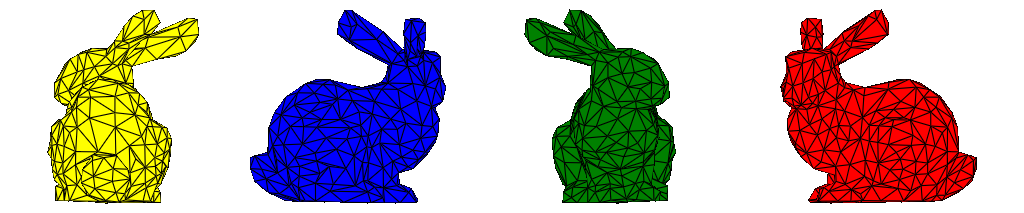

In [2]:
mesh["bunny_1"].config["plot"] = dict(color="red")
mesh["bunny_2"].config["plot"] = dict(color="green")
mesh["bunny_3"].config["plot"] = dict(color="blue")
mesh["bunny_4"].config["plot"] = dict(color="yellow")

plotter = mesh.plot(
    notebook=True, 
    config_key=["plot"], 
    return_plotter=True,
    theme="document",
    show_edges=True,
)
plotter.camera.tight(padding=0.1, view="xz", negative=True)
plotter.show(jupyter_backend="static")

## Transforming the references

In the previous example we achieved the end result by changing the coordinates of the vectors making up the mesh. We can achieve the same by changing the reference frames of the blocks.

In [3]:
from polymesh.space import CartesianFrame

ambient_frame = CartesianFrame(dim=3)

frame_1 = ambient_frame

frame_2 = (
    ambient_frame
    .rotate("Space", [0, 0, np.pi/2], "XYZ", inplace=False)
    .move([0.2, 0, 0], frame=ambient_frame)
    )

frame_3 = (
    ambient_frame
    .rotate("Space", [0, 0, np.pi], "XYZ", inplace=False)
    .move([0.4, 0, 0], frame=ambient_frame)
    )

frame_4 = (
    ambient_frame
    .rotate("Space", [0, 0, 3*np.pi/2], "XYZ", inplace=False)
    .move([0.6, 0, 0], frame=ambient_frame)
    )

In [4]:
from polymesh import PointData
from polymesh.cells import T3 as CellData

mesh = PolyData()

bunny = download_bunny_coarse(tetra=False, read=True).centralize()
coords, topo = bunny.coords(), bunny.topology()

mesh["bunny_1"] = PolyData(
    PointData(coords=coords),
    CellData(topo=topo),
    frame=frame_1
)

mesh["bunny_2"] = PolyData(
    PointData(coords=coords),
    CellData(topo=topo),
    frame=frame_2
)

mesh["bunny_3"] = PolyData(
    PointData(coords=coords),
    CellData(topo=topo),
    frame=frame_3
)

mesh["bunny_4"] = PolyData(
    PointData(coords=coords),
    CellData(topo=topo),
    frame=frame_4
)

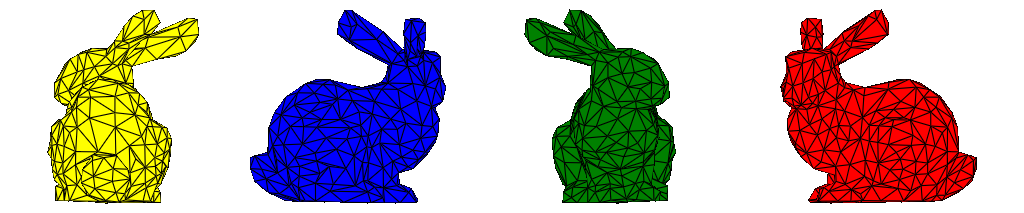

In [5]:
mesh["bunny_1"].config["plot"] = dict(color="red")
mesh["bunny_2"].config["plot"] = dict(color="green")
mesh["bunny_3"].config["plot"] = dict(color="blue")
mesh["bunny_4"].config["plot"] = dict(color="yellow")

plotter = mesh.plot(
    notebook=True, 
    config_key=["plot"], 
    return_plotter=True,
    theme="document",
    show_edges=True,
)
plotter.camera.tight(padding=0.1, view="xz", negative=True)
plotter.show(jupyter_backend="static")

When bringing the mesh to a standard form, the oriantations of the frames are taken into account:

In [6]:
mesh.to_standard_form()

PolyData({'bunny_1': PolyData({}), 'bunny_2': PolyData({}), 'bunny_3': PolyData({}), 'bunny_4': PolyData({})})

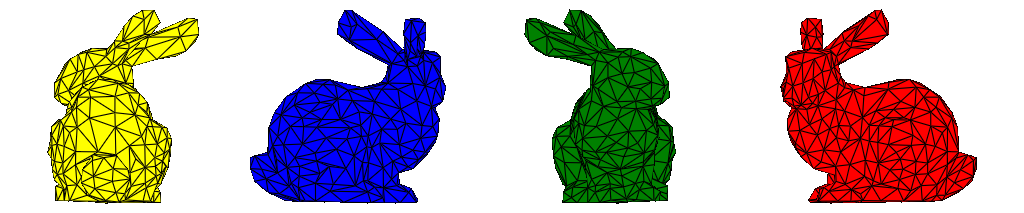

In [7]:
plotter = mesh.plot(
    notebook=True, 
    config_key=["plot"], 
    return_plotter=True,
    theme="document",
    show_edges=True,
)
plotter.camera.tight(padding=0.1, view="xz", negative=True)
plotter.show(jupyter_backend="static")